In [1]:
import pandas as pd

df = pd.read_excel("Machine learning db.xlsx", sheet_name="summer")


In [3]:
df.head()       # Shows the first five rows
df.info()       # Gives an overview of columns, data types, and non-null counts
df.describe()   # Provides summary statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  662 non-null    object 
 1   PSSRa    662 non-null    float64
 2   PSSRb    662 non-null    float64
 3   RARSc    662 non-null    float64
 4   PSSRc    662 non-null    float64
 5   CARI     662 non-null    float64
dtypes: float64(5), object(1)
memory usage: 31.2+ KB


,PSSRa,PSSRb,RARSc,PSSRc,CARI
count,662.000000,662.000000,662.000000,662.000000,662.000000
mean,7.013181,6.184048,5.418749,5.423976,1.433771
std,2.896802,2.561709,2.163958,2.161848,0.686798
min,2.379702,2.342322,1.934046,1.913839,0.352701
25%,5.021624,4.314450,3.859819,3.848042,0.929637
50%,6.125359,5.443022,4.853104,4.877192,1.229164
75%,8.345196,7.546112,6.697373,6.697320,1.929627
max,15.674217,15.186808,12.468778,12.375205,3.813228


Accuracy: 0.6090225563909775


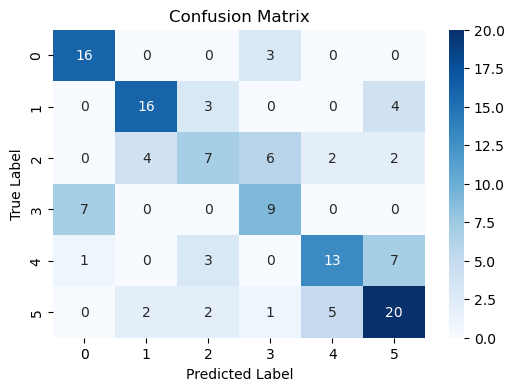

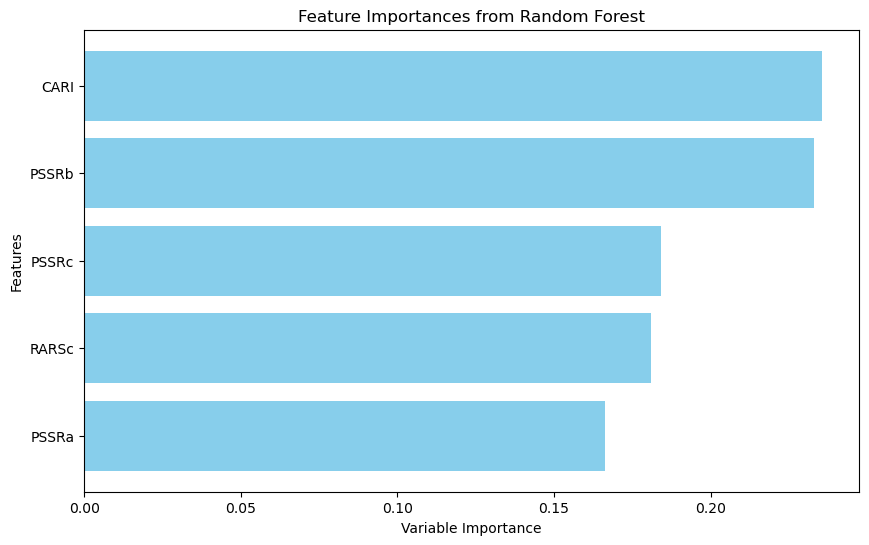

,CHEAL,CYPES,ECHCG,GASCI,Maize,SORHA
CHEAL,84.210526,0.000000,0.000000,15.789474,0.000000,0.000000
CYPES,0.000000,69.565217,13.043478,0.000000,0.000000,17.391304
ECHCG,0.000000,19.047619,33.333333,28.571429,9.523810,9.523810
GASCI,43.750000,0.000000,0.000000,56.250000,0.000000,0.000000
Maize,4.166667,0.000000,12.500000,0.000000,54.166667,29.166667
SORHA,0.000000,6.666667,6.666667,3.333333,16.666667,66.666667


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming 'df' is your DataFrame and 'target' is the name of your target column:
X = df.drop("species", axis=1)  # Features
y = df["species"]               # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Variable Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

cm_df

Accuracy: 0.6090225563909775


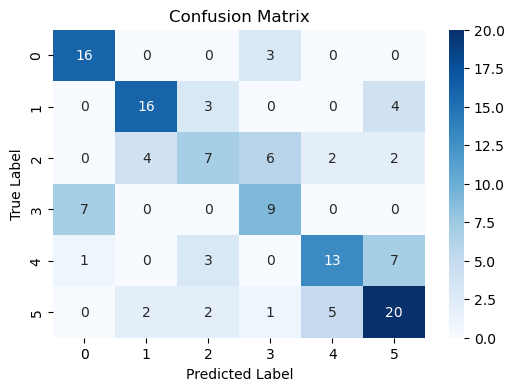

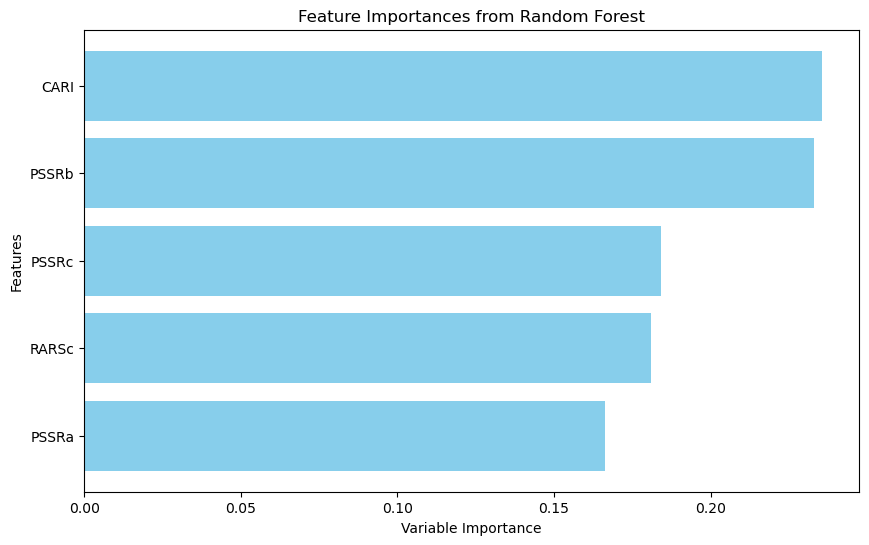

,CHEAL,CYPES,ECHCG,GASCI,Maize,SORHA
CHEAL,84.210526,0.000000,0.000000,15.789474,0.000000,0.000000
CYPES,0.000000,69.565217,13.043478,0.000000,0.000000,17.391304
ECHCG,0.000000,19.047619,33.333333,28.571429,9.523810,9.523810
GASCI,43.750000,0.000000,0.000000,56.250000,0.000000,0.000000
Maize,4.166667,0.000000,12.500000,0.000000,54.166667,29.166667
SORHA,0.000000,6.666667,6.666667,3.333333,16.666667,66.666667


In [7]:
# Assuming 'df' is your DataFrame and 'target' is the name of your target column:
X = df[["PSSRa","PSSRb","RARSc","PSSRc","CARI"]]  # Features
y = df["species"]               # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Variable Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

cm_df

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example lists of species for each category
monocot_species = ["Maize","SORHA","CYPES","ECHCG"]  # example species
dicot_species   = ["CHEAL","GASCI"]
weed_species    = ["SORHA","CYPES","ECHCG","CHEAL","GASCI"]  # example of some species labeled as weeds
crop_species    = ["Maize"]

# Third-level species groups (adjust these depending on your actual data):
monocot_weed_species = ["SORHA","CYPES","ECHCG"]
monocot_crop_species = [ "Maize"]
dicot_weed_species   = ["CHEAL","GASCI"]

# Assume df is your main dataframe with features and species
# Example:
# df = pd.read_csv("your_data.csv")

# Create first-level category
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
# Create second-level category
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

print(df[['category1', 'category2']].value_counts())

category1  category2
monocot    weed         343
dicot      weed         219
monocot    crop         100
Name: count, dtype: int64


In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example lists of species for each category
monocot_species = ["Maize","SORHA","CYPES","ECHCG"]  # example species
dicot_species   = ["CHEAL","GASCI"]
weed_species    = ["SORHA","CYPES","ECHCG","CHEAL","GASCI"]  # example of some species labeled as weeds
crop_species    = ["Maize"]

# Third-level species groups (adjust these depending on your actual data):
monocot_weed_species = ["SORHA","CYPES","ECHCG"]
monocot_crop_species = [ "Maize"]
dicot_weed_species   = ["CHEAL","GASCI"]

# Assume df is your main dataframe with features and species
# Example:
# df = pd.read_csv("your_data.csv")

# Create first-level category
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
# Create second-level category
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

# Features and target
X = df[["PSSRa", "PSSRb", "RARSc", "PSSRc", "CARI"]]
y_cat1 = df["category1"]  # Level 1 target

# Level 1: Monocot vs Dicot
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1)
clf_cat1 = RandomForestClassifier(random_state=42)
clf_cat1.fit(X_train_cat1, y_train_cat1)

y_pred_cat1 = clf_cat1.predict(X_test_cat1)

# Split test data by predicted category1
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

y_test_monocot = df.loc[X_test_monocot.index, 'category2']
y_test_dicot   = df.loc[X_test_dicot.index, 'category2']

# Level 2: Weed vs Crop (for monocot)
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df['category2'][monocot_mask]

X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(X_monocot, y_monocot, test_size=0.2, random_state=42, stratify=y_monocot)
clf_cat2_monocot = RandomForestClassifier(random_state=42)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)

# Level 2: Weed vs Crop (for dicot)
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]

X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot)
clf_cat2_dicot = RandomForestClassifier(random_state=42)
clf_cat2_dicot.fit(X_train_di, y_train_di)

y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)

# Now we have predictions for category1 and category2. Next: species level.

# For the third level, we train separate models for each final group:
# Monocot-Weed, Monocot-Crop, Dicot-Weed, Dicot-Crop.

# Example: Monocot-Weed model (if multiple species in that group)
mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]

clf_mono_weed = RandomForestClassifier(random_state=42)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

# Monocot-Crop model
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]

clf_mono_crop = RandomForestClassifier(random_state=42)
clf_mono_crop.fit(X_mono_crop, y_mono_crop)

# Dicot-Weed model
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]

clf_dicot_weed = RandomForestClassifier(random_state=42)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)


# Predict species level on the test set:
# For each test sample, use the predicted category1 and category2 to decide which classifier to use at level 3.

final_species_preds = []

for idx in X_test_cat1.index:
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    if cat1_pred == 'monocot':
        cat2_pred = clf_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]  # use monocot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_mono_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        cat2_pred = clf_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]  # use dicot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_dicot_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]

    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

# Evaluate accuracy of final species predictions:
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_species,final_species_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_species)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df



Final Species-Level Accuracy: 0.9624060150375939


,CHEAL,CYPES,ECHCG,GASCI,Maize,SORHA
CHEAL,100.0,0.0,0.0,0.0,0.000000,0.000000
CYPES,0.0,100.0,0.0,0.0,0.000000,0.000000
ECHCG,0.0,0.0,95.0,0.0,5.000000,0.000000
GASCI,0.0,0.0,0.0,100.0,0.000000,0.000000
Maize,0.0,0.0,0.0,0.0,100.000000,0.000000
SORHA,0.0,0.0,0.0,0.0,10.810811,89.189189


In [ ]:
class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)[source]
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

Read more in the User Guide.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
# Assuming 'df' is your DataFrame and 'target' is the name of your target column:
X = df[["PSSRa","PSSRb","RARSc","PSSRc","CARI"]]  # Features
y = df["species"]               # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#gridsearch
from sklearn.model_selection import GridSearchCV
# Define a dictionary with the hyperparameters you wish to tune:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid)
grid_search.fit(X, y)


y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Variable Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

cm_df

Accuracy: 0.41237113402061853
